# Tuning SARSA agent

1) During the first experiments and tests of our SARSA agent, it was not clear if glei strategy was more efficient than a basic epsilon greedy (strategy whre that we don't decay epsilon through training).  
Therefore, we will first study the differences between the glei and the normal strategies.  
**Results are interesting: they highlight the fact that glei strategy has no advantages (in terms of optimality and speed of convergence) for every epsilon above 0.2 and under 0.001.**  
**However, for epsilon of 0.005 & 0.01, glei strategy converges better and faster**

2) Then, the grid search highlights that the best set of parameter is:
    * Use GLEI strategy
    * starting epsilon: 0.005
    * alpha: 0.1
    * gamma: 1

# Libraries

In [1]:
import gymnasium as gym
import numpy as np
from agents.sarsa import Sarsa
from agents.qlearning import QLearning

from utils.encoding import mc_tile_encoding
from utils.utils_fct import plot_moving_averages, process_json
from utils.policy import epsilon_greedy_policy, softmax_policy

# Testing agent

In [ ]:
env = gym.make("MountainCar-v0", render_mode=None)

sarsa_agent = Sarsa(
    encode_fct=mc_tile_encoding,
    policy=epsilon_greedy_policy,
    nb_actions=env.action_space.n,
)

_ = sarsa_agent.train(
    env=env, alpha=0.1, gamma=1, verbose=0, nb_episodes=1000, epsilon=0.01
)
_ = sarsa_agent.evaluate_policy(env=env, nb_episodes=10, verbose=1)  # , epsilon=0)

# $\epsilon$-Greedy Sarsa

In [2]:
env = gym.make("MountainCar-v0", render_mode=None)

eps_greedy_sarsa = Sarsa(
    encode_fct=mc_tile_encoding,
    policy=epsilon_greedy_policy,
    nb_actions=env.action_space.n,
)

## 1. Studying the Impact of GLEI Strategy on $\epsilon$-Greedy Policy

In [5]:
glei_tune_historic = eps_greedy_sarsa.grid_search(
    env=env,
    nb_episodes=1000,
    nb_iter=10,
    use_glei=True,
    verbose=1,
    alpha=[0.1],
    gamma=[0.99],
    epsilon=[0.005, 0.01, 0.05, 0.1],
)

no_glei_tune_historic = eps_greedy_sarsa.grid_search(
    env=env,
    nb_episodes=1000,
    nb_iter=1,
    use_glei=False,
    verbose=1,
    alpha=[0.1],
    gamma=[0.99],
    epsilon=[0.005, 0.01, 0.05, 0.1],
)

data_dict = {**no_glei_tune_historic, **glei_tune_historic}
process_json("./data/sarsa/eps_greedy/glei_vs_noglei", "w", data_dict=data_dict)

Processing:
use_glei=True_alpha=0.1_gamma=0.99_epsilon=0.005

Processing:
use_glei=True_alpha=0.1_gamma=0.99_epsilon=0.01

Processing:
use_glei=True_alpha=0.1_gamma=0.99_epsilon=0.05



KeyboardInterrupt: 

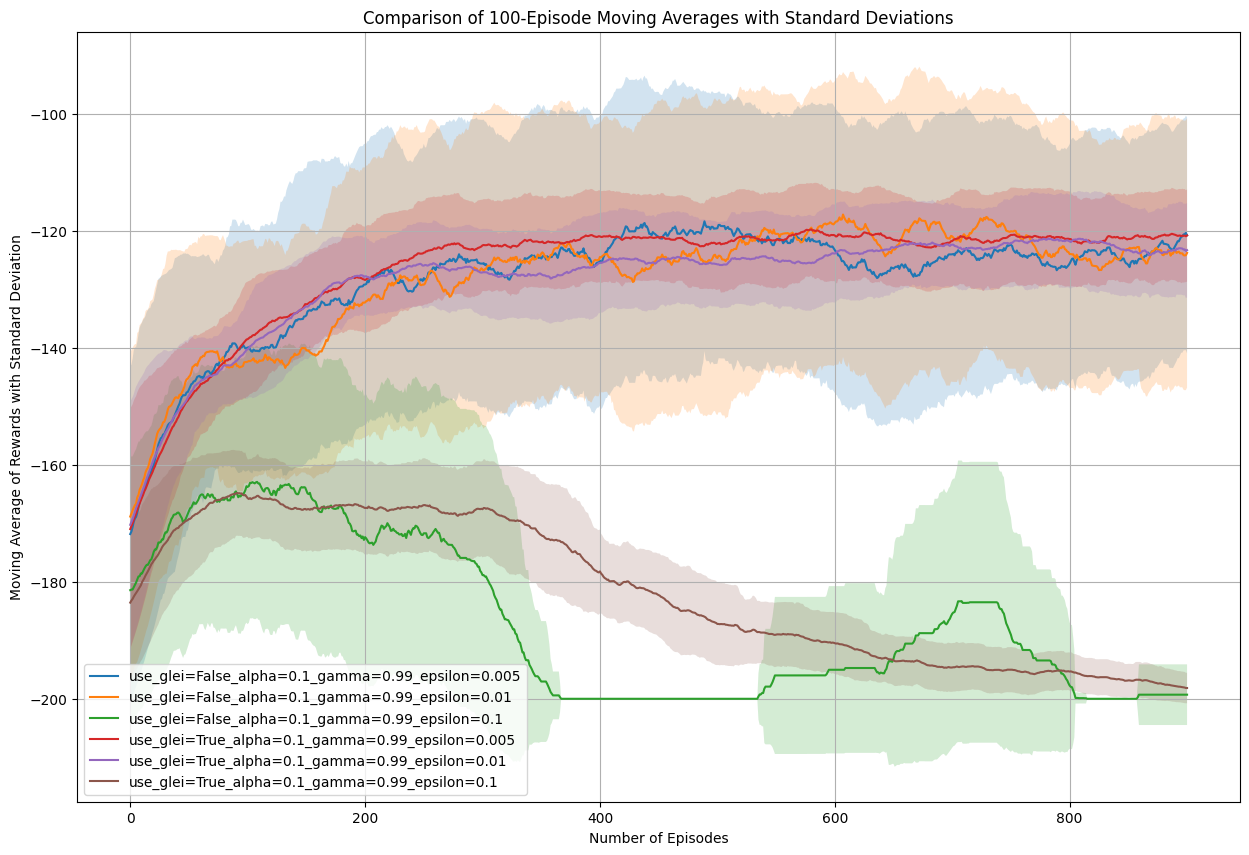

In [4]:
plot_moving_averages(
    process_json("./data/sarsa/eps_greedy/glei_vs_noglei", "r"),
    nb_episodes=1000,
    window_size=100,
)

## 2. Searching best $\alpha$ and $\gamma$

In [ ]:
alpha_gamma_tune_historic = eps_greedy_sarsa.grid_search(
    env=env,
    nb_episodes=1000,
    nb_iter=10,
    use_glei=True,
    verbose=0,
    alpha=[0.005, 0.01, 0.05],
    gamma=[0.9, 0.99, 1],
    epsilon=[0.005],
)
process_json(
    "./data/sarsa/eps_greedy/alpha_gamma_search_epsilon=0.005_glei=true",
    "w",
    data_dict=alpha_gamma_tune_historic,
)

-121.0
-157.0
-149.0
-159.0
-127.0
-116.0
-173.0
-113.0
-143.0
-111.0


/Users/pneveu/Library/Caches/pypoetry/virtualenvs/mountain-car-dUPDKyLO-py3.10/lib/python3.10/site-packages/numpy/_core/_methods.py:194: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


-110.0
-109.0
-109.0
-109.0
-86.0
-109.0
-87.0
-108.0
-108.0
-107.0
-95.0
-110.0
-109.0
-109.0
-111.0
-109.0
-90.0
-89.0
-110.0
-111.0
-87.0
-119.0
-112.0
-138.0
-117.0
-119.0
-84.0
-150.0
-108.0
-143.0
-86.0
-87.0
-85.0
-84.0
-86.0
-84.0
-85.0
-85.0
-85.0
-86.0
-84.0
-83.0
-83.0
-85.0
-86.0
-84.0
-85.0
-84.0
-84.0
-84.0


/Users/pneveu/Library/Caches/pypoetry/virtualenvs/mountain-car-dUPDKyLO-py3.10/lib/python3.10/site-packages/numpy/_core/_methods.py:205: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


-115.0
-114.0
-133.0
-123.0
-115.0
-100.0
-115.0
-116.0
-112.0
-139.0
-83.0
-83.0
-83.0
-83.0
-83.0
-83.0
-83.0
-83.0
-83.0
-83.0
-83.0
-83.0
-83.0
-83.0
-83.0
-84.0
-83.0
-83.0
-83.0
-83.0
Dictionary saved to ./data/sarsa/eps_greedy/alpha_gamma_search_epsilon=0.005_glei=true


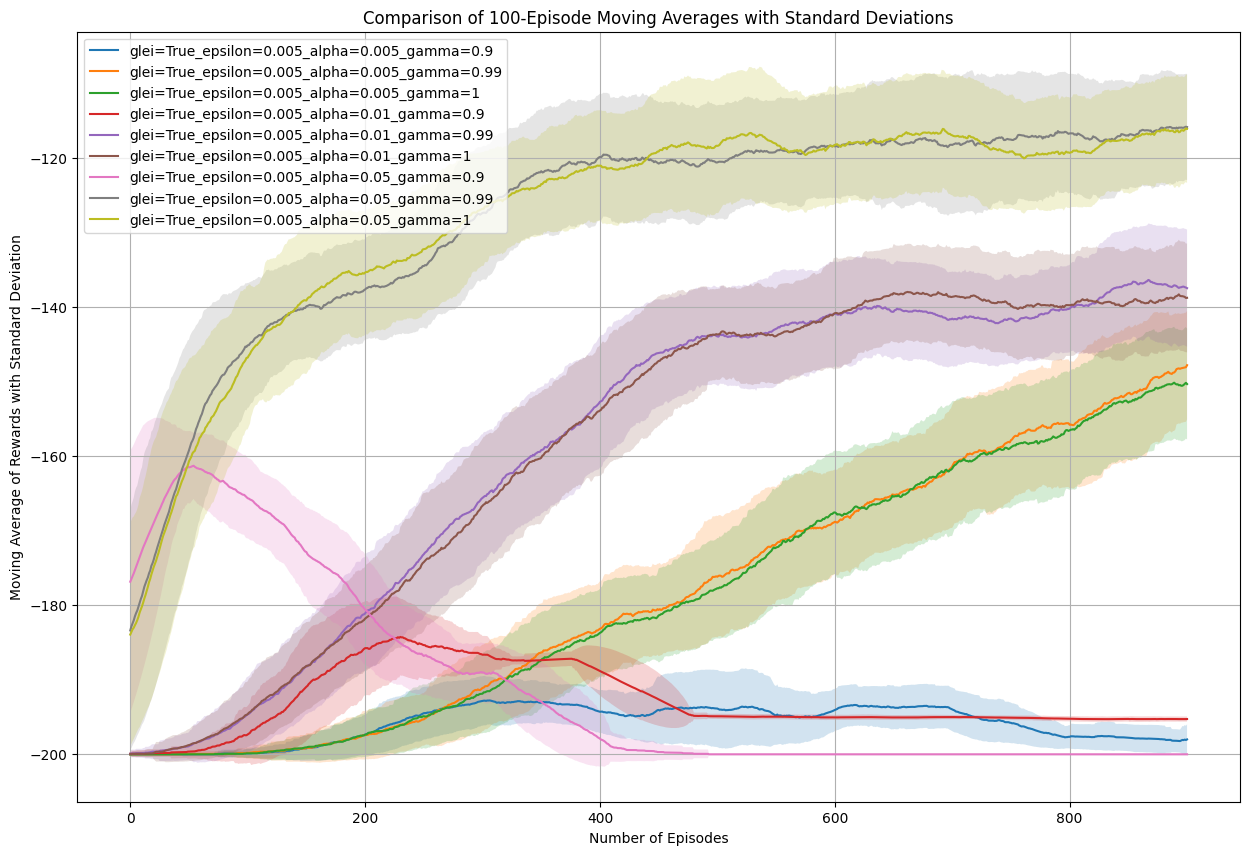

In [ ]:
plot_moving_averages(
    process_json(
        "./data/sarsa/eps_greedy/alpha_gamma_search_epsilon=0.005_glei=true", "r"
    ),
    nb_episodes=1000,
    window_size=100,
)

# Softmax Sarsa

In [5]:
env = gym.make("MountainCar-v0", render_mode=None)

softmax_sarsa = Sarsa(
    encode_fct=mc_tile_encoding,
    policy=softmax_policy,
    nb_actions=env.action_space.n,
)

## 1. Searching best $\alpha$

In [ ]:
alpha_gamma_tune_historic = softmax_sarsa.grid_search(
    env=env,
    nb_episodes=1000,
    nb_iter=10,
    verbose=0,
    alpha=[0.005, 0.01, 0.05, 0.1],
    gamma=[1],
)
process_json(
    "./data/sarsa/softmax/alpha_search",
    "w",
    data_dict=alpha_gamma_tune_historic,
)

Processing:
alpha=0.005_gamma=1

Iteration 1/10 for alpha=0.005_gamma=1
Episode 1: Total Reward = -200.0
Episode 2: Total Reward = -200.0
Episode 3: Total Reward = -200.0
Episode 4: Total Reward = -200.0
Episode 5: Total Reward = -200.0
Episode 6: Total Reward = -200.0
Episode 7: Total Reward = -200.0
Episode 8: Total Reward = -200.0
Episode 9: Total Reward = -200.0
Episode 10: Total Reward = -200.0
Episode 11: Total Reward = -200.0
Episode 12: Total Reward = -200.0
Episode 13: Total Reward = -200.0
Episode 14: Total Reward = -200.0
Episode 15: Total Reward = -200.0
Episode 16: Total Reward = -200.0
Episode 17: Total Reward = -200.0
Episode 18: Total Reward = -200.0
Episode 19: Total Reward = -200.0
Episode 20: Total Reward = -200.0
Episode 21: Total Reward = -200.0
Episode 22: Total Reward = -200.0
Episode 23: Total Reward = -200.0
Episode 24: Total Reward = -200.0
Episode 25: Total Reward = -200.0
Episode 26: Total Reward = -200.0
Episode 27: Total Reward = -200.0
Episode 28: Total R

/Users/pneveu/Library/Caches/pypoetry/virtualenvs/mountain-car-dUPDKyLO-py3.10/lib/python3.10/site-packages/numpy/_core/_methods.py:194: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)



Episode 117: Total Reward = -200.0
Episode 118: Total Reward = -200.0
Episode 119: Total Reward = -200.0
Episode 120: Total Reward = -200.0
Episode 121: Total Reward = -200.0
Episode 122: Total Reward = -200.0
Episode 123: Total Reward = -200.0
Episode 124: Total Reward = -200.0
Episode 125: Total Reward = -200.0
Episode 126: Total Reward = -200.0
Episode 127: Total Reward = -200.0
Episode 128: Total Reward = -200.0
Episode 129: Total Reward = -200.0
Episode 130: Total Reward = -200.0
Episode 131: Total Reward = -200.0
Episode 132: Total Reward = -200.0
Episode 133: Total Reward = -200.0
Episode 134: Total Reward = -200.0
Episode 135: Total Reward = -200.0
Episode 136: Total Reward = -200.0
Episode 137: Total Reward = -200.0
Episode 138: Total Reward = -200.0
Episode 139: Total Reward = -200.0
Episode 140: Total Reward = -200.0
Episode 141: Total Reward = -200.0
Episode 142: Total Reward = -200.0
Episode 143: Total Reward = -200.0
Episode 144: Total Reward = -200.0
Episode 145: Total 

/Users/pneveu/Library/Caches/pypoetry/virtualenvs/mountain-car-dUPDKyLO-py3.10/lib/python3.10/site-packages/numpy/_core/_methods.py:205: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


Episode 399: Total Reward = -151.0
Episode 400: Total Reward = -122.0
Episode 401: Total Reward = -149.0
Episode 402: Total Reward = -148.0
Episode 403: Total Reward = -108.0
Episode 404: Total Reward = -144.0
Episode 405: Total Reward = -149.0
Episode 406: Total Reward = -150.0
Episode 407: Total Reward = -108.0
Episode 408: Total Reward = -150.0
Episode 409: Total Reward = -137.0
Episode 410: Total Reward = -148.0
Episode 411: Total Reward = -134.0
Episode 412: Total Reward = -108.0
Episode 413: Total Reward = -106.0
Episode 414: Total Reward = -157.0
Episode 415: Total Reward = -152.0
Episode 416: Total Reward = -107.0
Episode 417: Total Reward = -155.0
Episode 418: Total Reward = -197.0
Episode 419: Total Reward = -114.0
Episode 420: Total Reward = -152.0
Episode 421: Total Reward = -138.0
Episode 422: Total Reward = -107.0
Episode 423: Total Reward = -91.0
Episode 424: Total Reward = -141.0
Episode 425: Total Reward = -125.0
Episode 426: Total Reward = -134.0
Episode 427: Total Re

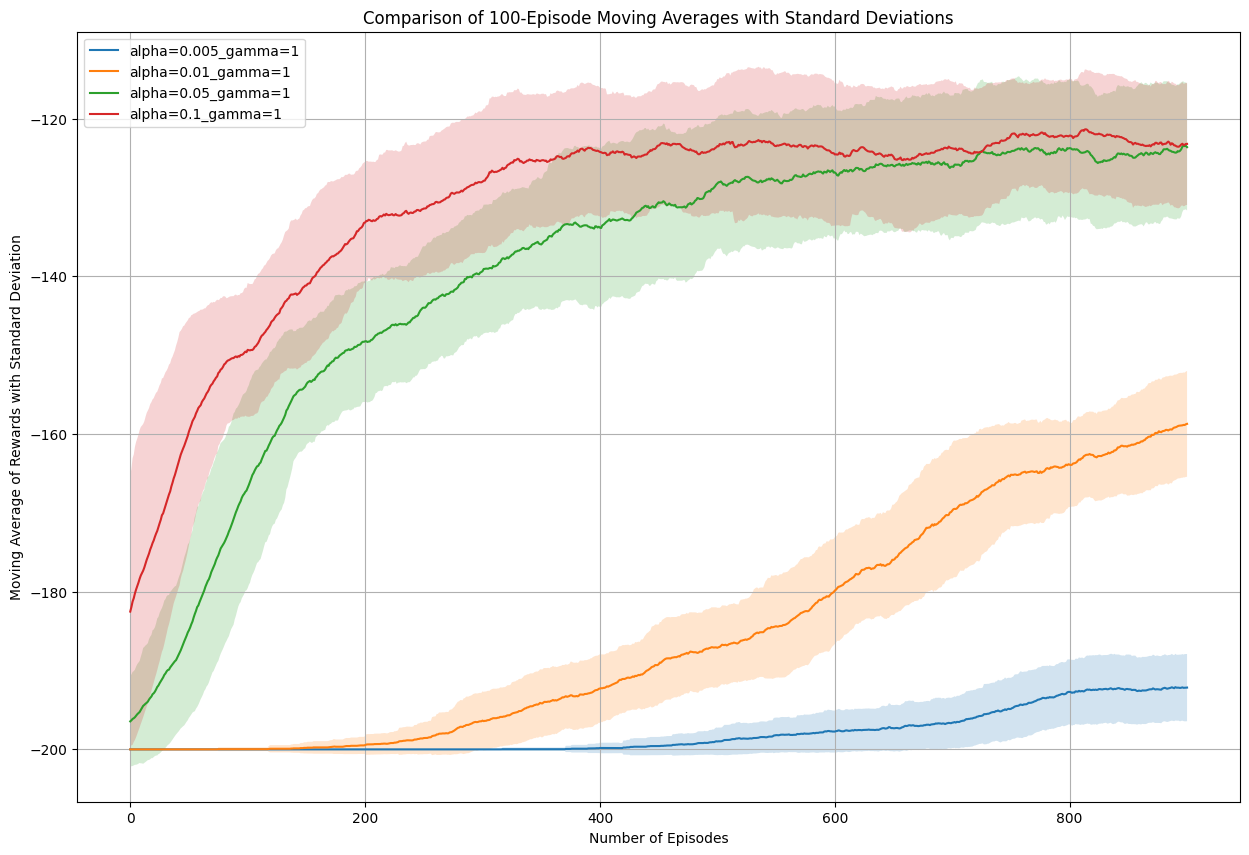

In [6]:
plot_moving_averages(
    process_json("./data/sarsa/softmax/alpha_search", "r"),
    nb_episodes=1000,
    window_size=100,
)